In [18]:
#We have imported the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [26]:
import os
for dirname, _, filenames in os.walk('data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
project = pd.read_csv('data1.csv')

In [33]:
project.head() #We brought in the first 5 rows of the data we found.


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [34]:
project.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [35]:
project.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [36]:
project.rename(columns = {'Adaptivity Level':'Adaptivity'},inplace = True)
project.rename(columns = {'Age': 'Age Range'},inplace = True)

project.replace("Boy","Male",inplace=True)
project.replace("Girl","Female",inplace=True)
project.replace("Mid","Middle Class",inplace=True)
project.replace("Poor","Lower Class",inplace=True)
project.replace("Rich","Upper Class",inplace=True)

In [37]:
project

,Gender,Age Range,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low


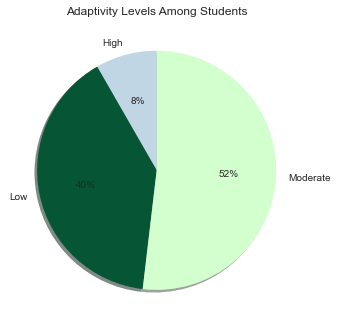

In [75]:
#In order to question whether the students have adapted to the online system or not,we had them plotted with a pie chart.

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
colors = ['#c0d6e4','#065535','#d3ffce']

Adapt= project.groupby([  
        'Adaptivity'])['Adaptivity'].count().to_frame()

plt.pie(Adapt.Adaptivity,colors= colors,
        labels = Adapt.index,startangle = 90, autopct = "%1.0f%%", 
        explode = None, shadow = True)
plt.title("Adaptivity Levels Among Students")
plt.show()

In [39]:
#We formed 3 different groups to observe the relationships between the measured independent variables and adaptability.

def create_groups(
    df: pd.DataFrame, var1: str, 
    var2: str)->pd.DataFrame:
    
    category = df.groupby([var1,var2])[var2].count().to_frame()
    
    print('Adaptivity' + ' by ' + var1)
    
    return category

create_groups(project, 'Education Level', 'Adaptivity')

Adaptivity by Education Level


Adaptivity
Education Level Adaptivity            
College         High                 3
                Low                120
                Moderate            96
School          High                47
                Low                182
                Moderate           301
University      High                50
                Low                178
                Moderate           228

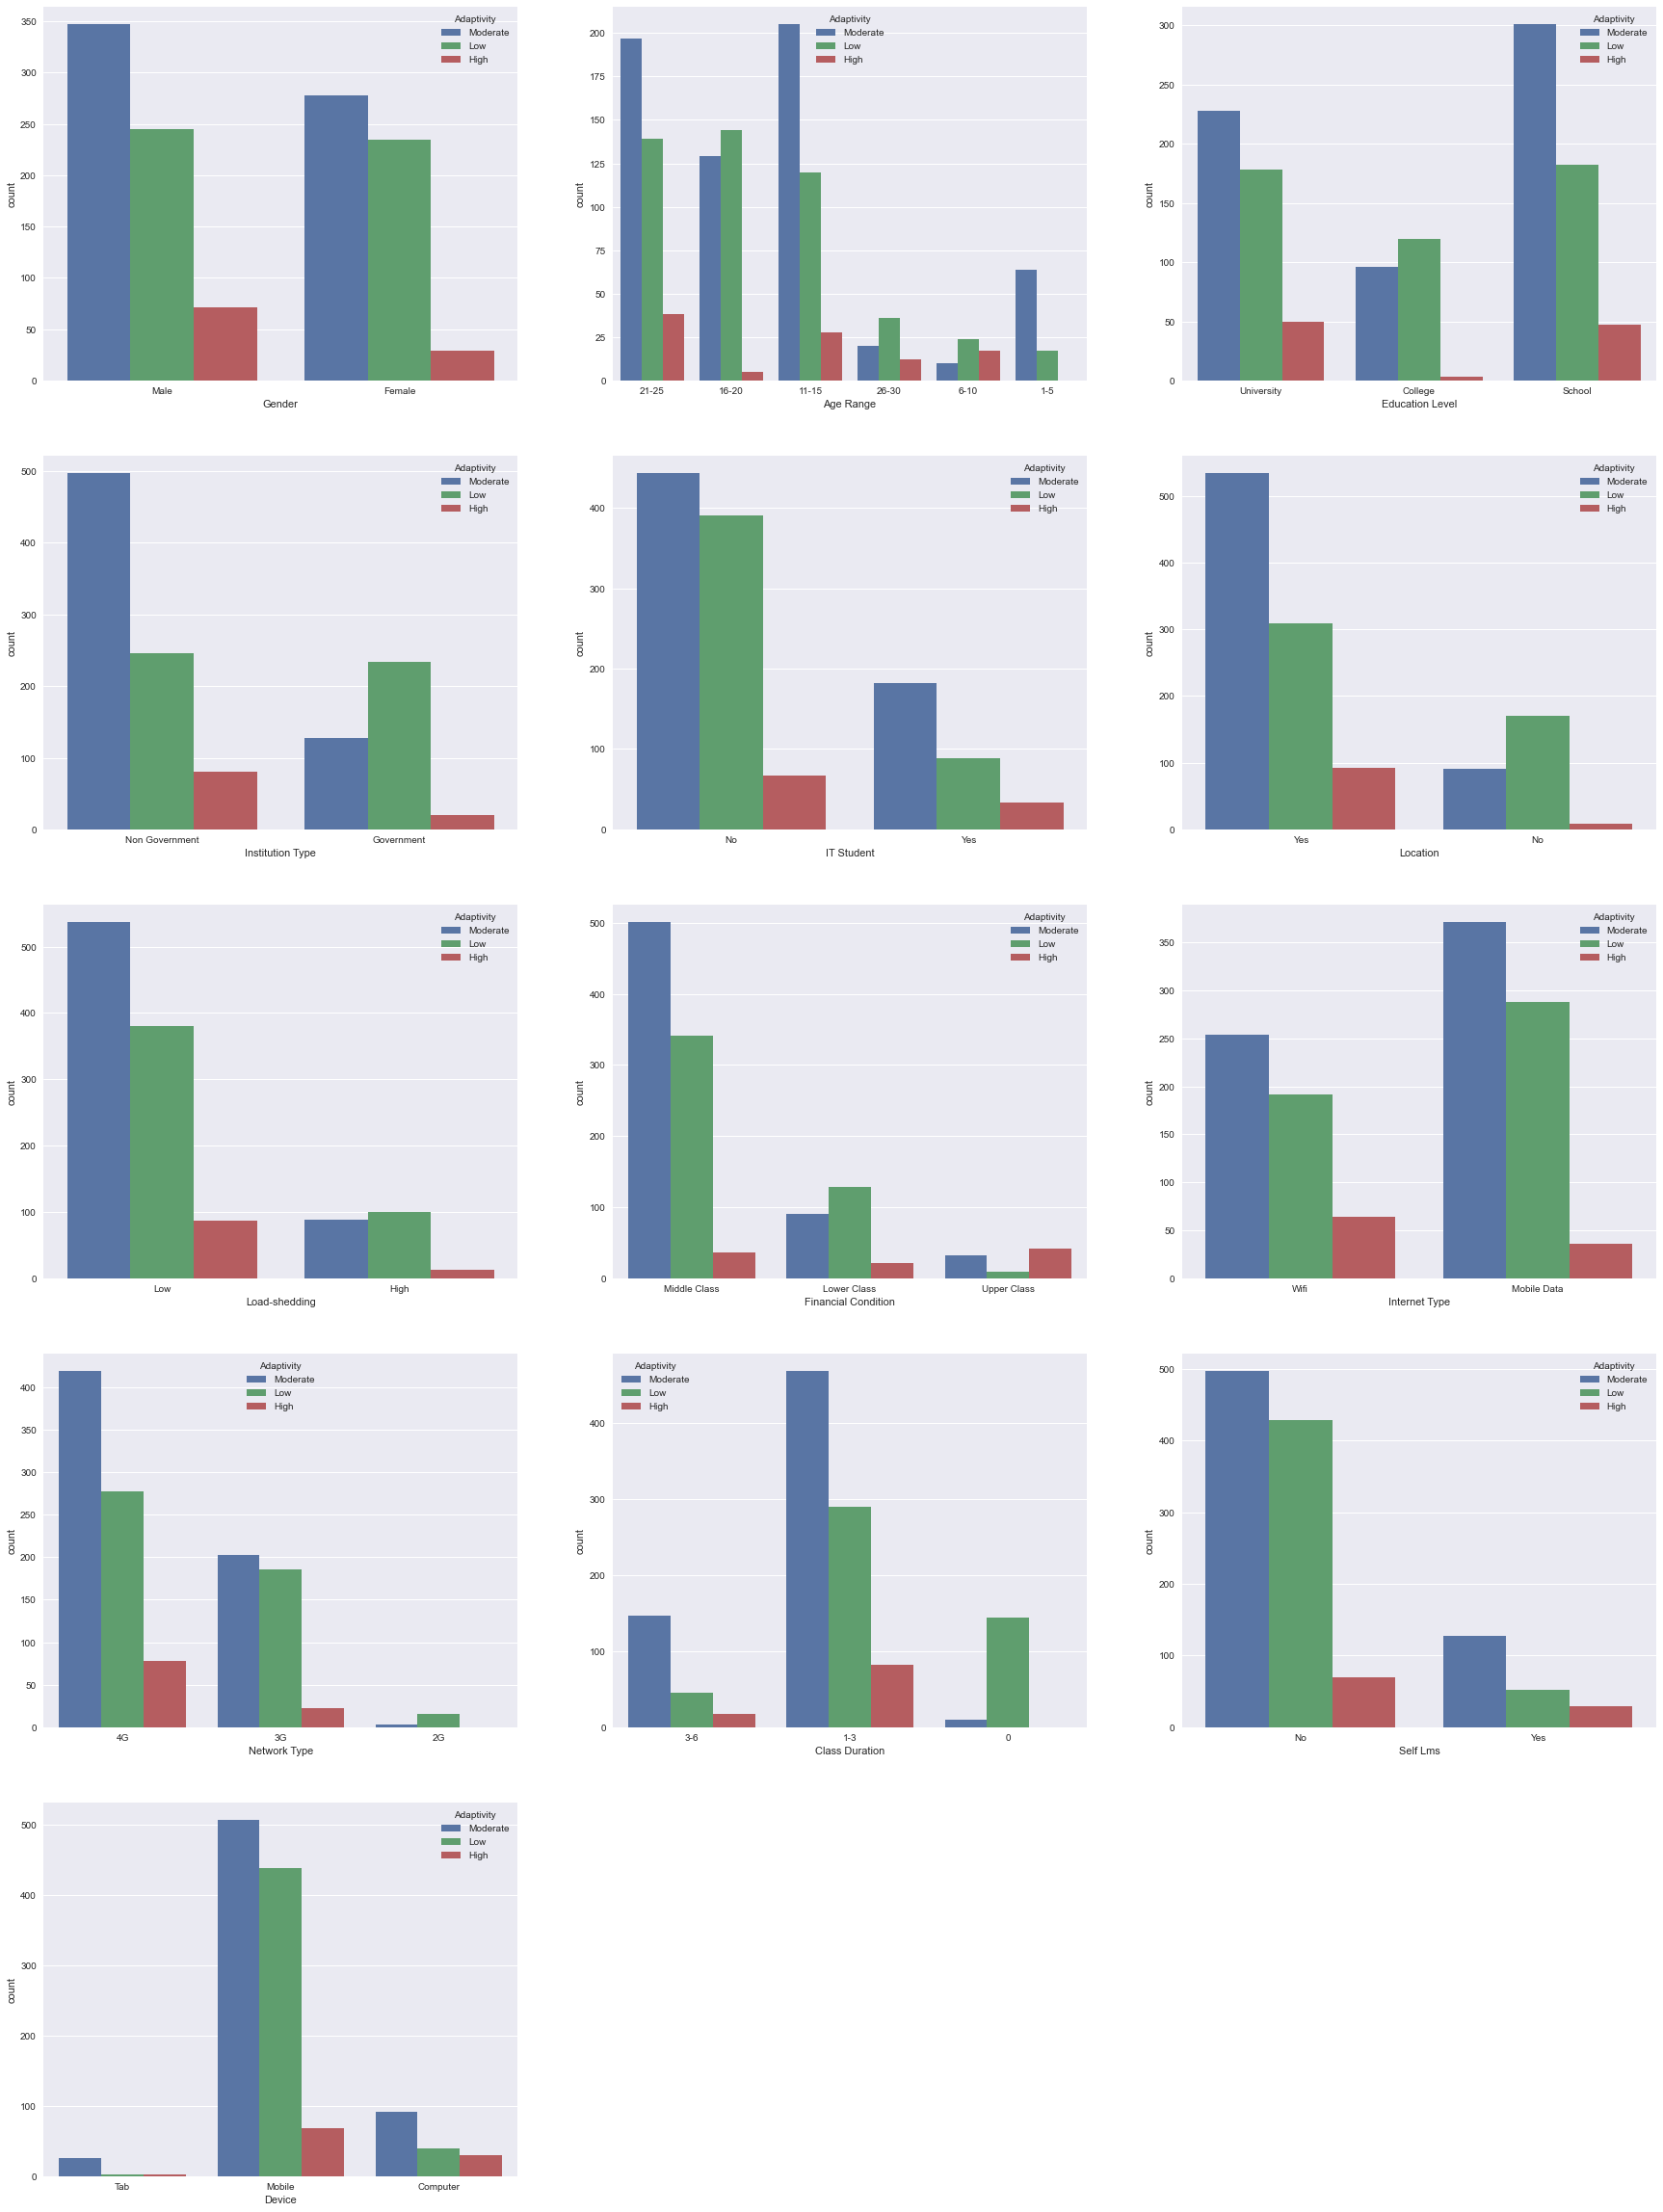

In [74]:
#We created and observed barplot for different categories.
i = 1
plt.figure(figsize = (30,50))
for feature in [col for col in project.columns if col!='Adaptivity' ]:
    plt.subplot(6,3,i),  
    sns.countplot(x = feature , hue='Adaptivity', data = project,)
 
    i +=1

In [42]:
project.describe().T

,count,unique,top,freq
Gender,1205,2,Male,663
Age Range,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Middle Class,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


(array([374.,   0., 278.,   0., 353.,   0.,  68.,   0.,  51.,  81.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

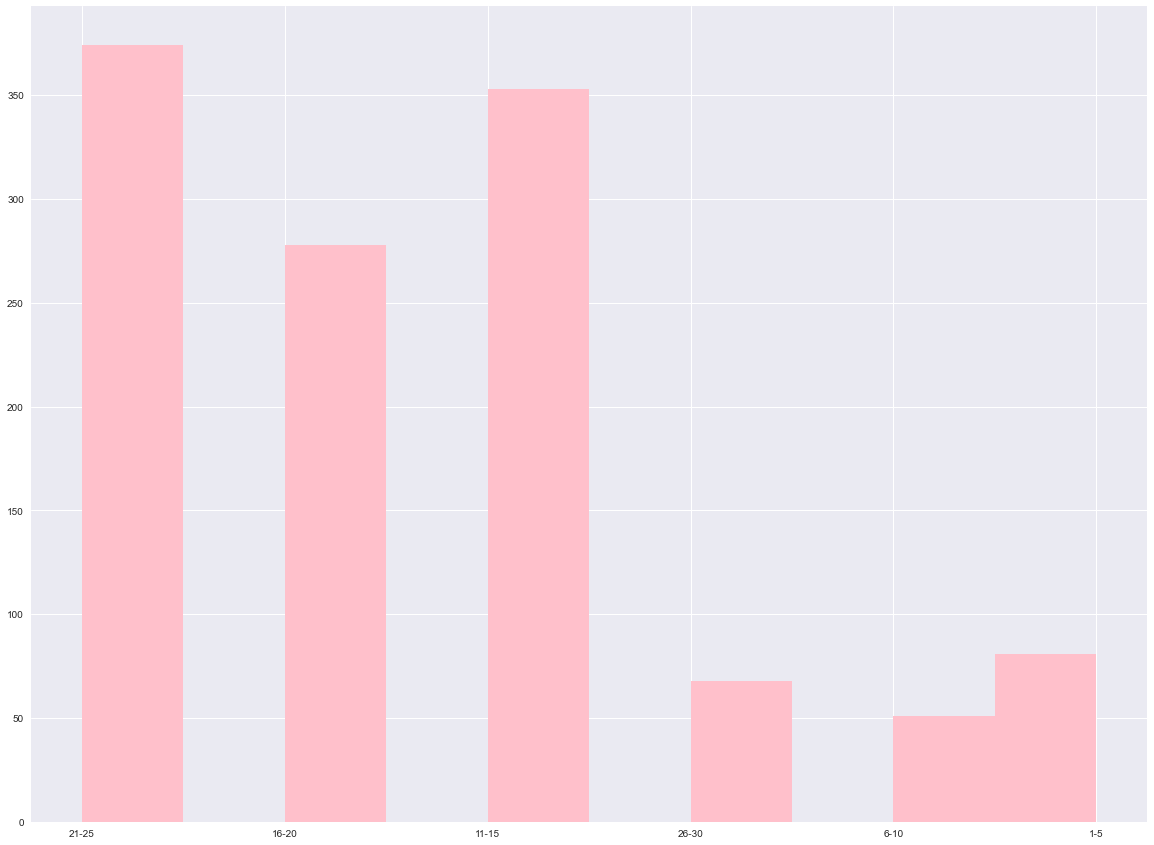

In [64]:
plt.figure(figsize=(20,15))
plt.hist(data=project, x='Age Range',color="pink")

In [46]:
project.columns

Index(['Gender', 'Age Range', 'Education Level', 'Institution Type',
       'IT Student', 'Location', 'Load-shedding', 'Financial Condition',
       'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity'],
      dtype='object')

In [55]:
group = project.groupby(['Gender', 
            'Age Range',
            'Adaptivity'])['Adaptivity'].count().to_frame()

group

Adaptivity
Gender Age Range Adaptivity            
Female 1-5       Low                  3
                 Moderate            64
       11-15     High                 5
                 Low                 46
                 Moderate            91
       16-20     High                 5
                 Low                104
                 Moderate            60
       21-25     High                 6
                 Low                 45
                 Moderate            58
       26-30     Low                 26
       6-10      High                13
                 Low                 11
                 Moderate             5
Male   1-5       Low                 14
       11-15     High                23
                 Low                 74
                 Moderate           114
       16-20     Low                 40
                 Moderate            69
       21-25     High                32
                 Low                 94
                 Moderate           139
       26-30     High                12
                 Low                 10
                 Moderate            20
       6-10      High                 4
                 Low                 13
                 Moderate             5

Text(0.5, 0, 'Adaptivity count')

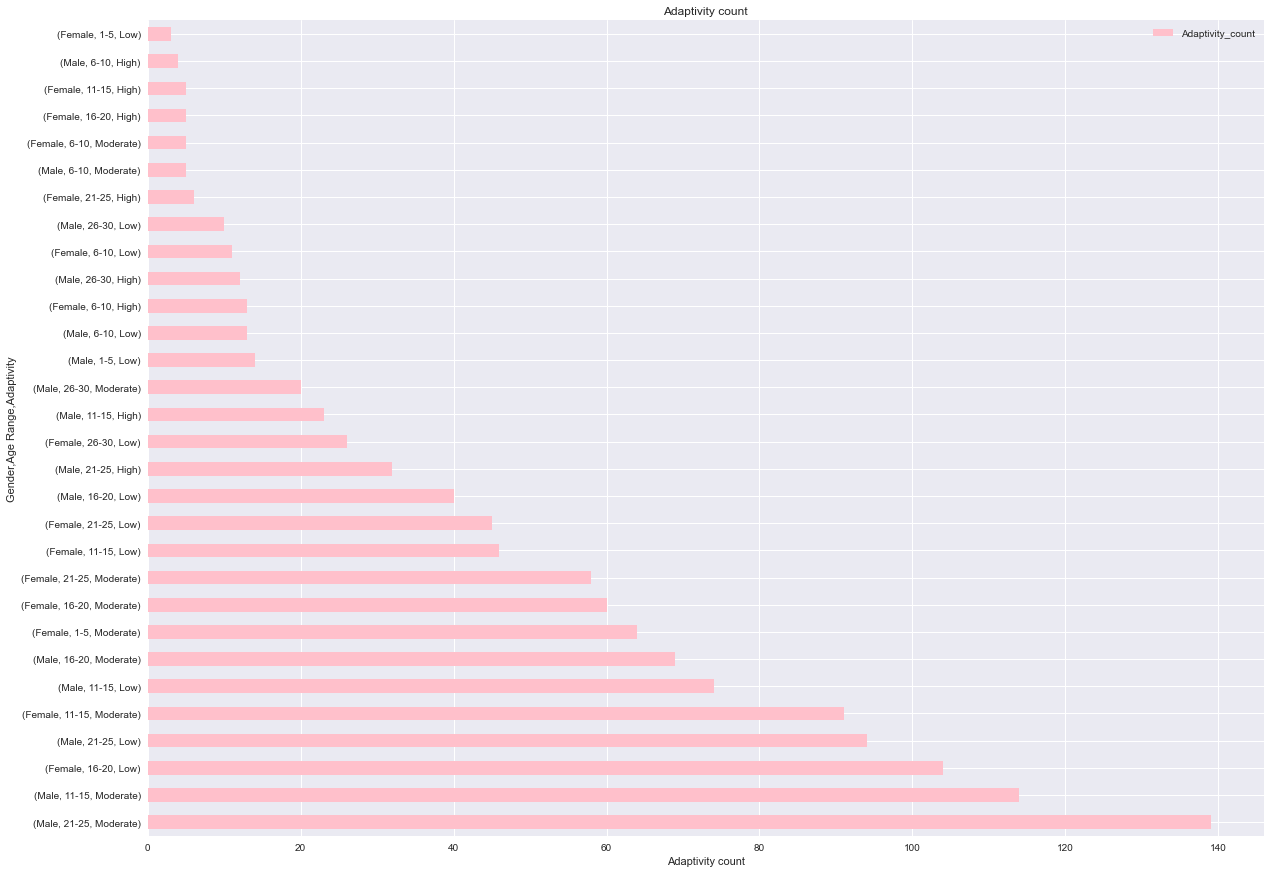

In [63]:
group.columns = ['Adaptivity_count']
ax = group.sort_values(by='Adaptivity_count', ascending=False).plot(kind='barh', figsize=(20,15), title='Adaptivity count',color="pink")
ax.set_xlabel('Adaptivity count')